In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk.corpus as corpus
import nltk

from bokeh.layouts import layout
from bokeh.layouts import widgetbox

from bokeh.embed import file_html

from bokeh.io import show
from bokeh.io import output_notebook 

from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker
from bokeh.charts import Line
from bokeh.plotting import figure

from bokeh.palettes import Spectral6
from bokeh.charts import Bar

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
df=pd.read_csv('mark.csv')

In [3]:
df.shape

(858, 2)

In [4]:
df.head()

,Person,Text
0,GRASSLEY:,I'll start with you.\n\nFacebook handles exte...
1,ZUCKERBERG:,"Mr. Chairman, thank you.\n\nAs I mentioned, w..."
2,GRASSLEY:,OK (ph).\n\nHave you ever required an audit t...
3,ZUCKERBERG:,"Mr. Chairman, yes we have. I don't have the e..."
4,GRASSLEY:,"I was going to assume that, sitting here toda..."


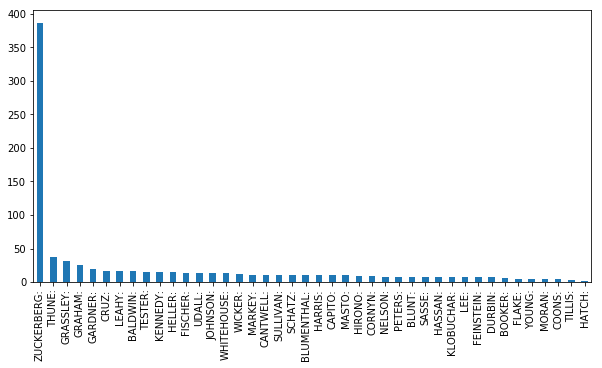

In [12]:
plt.figure(figsize=(10,5))
df['Person'].value_counts().plot.bar()

In [13]:
def get_count(x):
    return len(nltk.word_tokenize(x))
df['len']=df['Text'].map(get_count)

In [14]:
df.head()

,Person,Text,len
0,GRASSLEY:,I'll start with you.\n\nFacebook handles exte...,139
1,ZUCKERBERG:,"Mr. Chairman, thank you.\n\nAs I mentioned, w...",166
2,GRASSLEY:,OK (ph).\n\nHave you ever required an audit t...,29
3,ZUCKERBERG:,"Mr. Chairman, yes we have. I don't have the e...",143
4,GRASSLEY:,"I was going to assume that, sitting here toda...",55


In [15]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [73]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves","thank","you","mr","zuckerberg","chairman"])

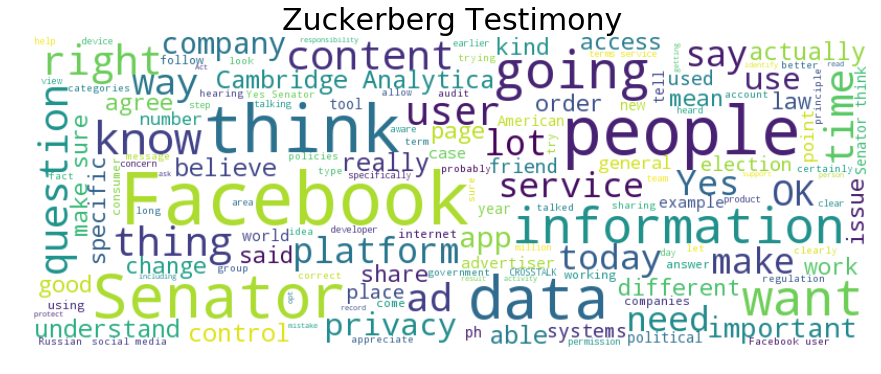

In [74]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS)
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"]
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Zuckerberg Testimony", fontsize=30)
plt.axis("off")
plt.savefig("mark",dpi=600)
plt.show()

In [75]:
print("The total words spoken by Mark were {} words".format(df.query("Person=='ZUCKERBERG:'")['len'].sum()))
print("The average length of his response was {} words".format(round(df.query("Person=='ZUCKERBERG:'")['len'].mean(),2)))
print("The maximum length of Mark's response was {} words".format(df.query("Person=='ZUCKERBERG:'")['len'].max()))

The total words spoken by Mark were 19959 words
The average length of his response was 51.71 words
The maximum length of Mark's response was 524 words


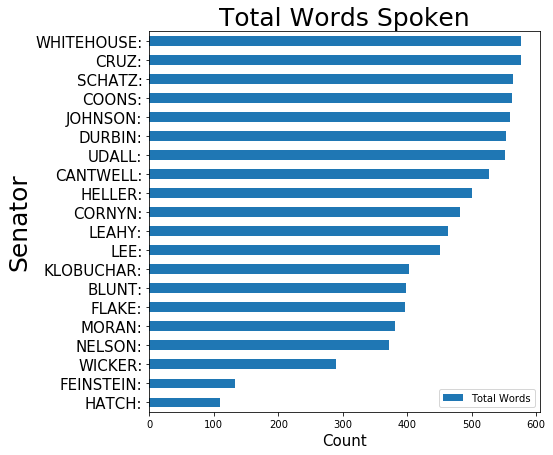

In [76]:
df.query("Person !='ZUCKERBERG:'").groupby("Person").sum().rename(columns={'len':'Total Words'}).sort_values("Total Words",ascending=True).head(20).plot(kind="barh",figsize=(7,7))
plt.title("Total Words Spoken",fontsize=25)
plt.ylabel("Senator",fontsize=25)
plt.yticks(fontsize=15)
plt.xlabel("Count",fontsize=15)

In [77]:
from sklearn.feature_extraction import text
def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words=ENGLISH_STOP_WORDS)
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

#### Mark Bhaiya kya bole re!

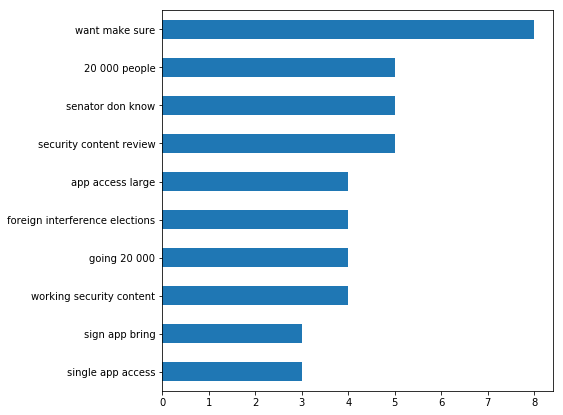

In [78]:
mark=df[df['Person']=="ZUCKERBERG:"]['Text'].tolist()
get_imp(mark,mf=5000,ngram=3).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

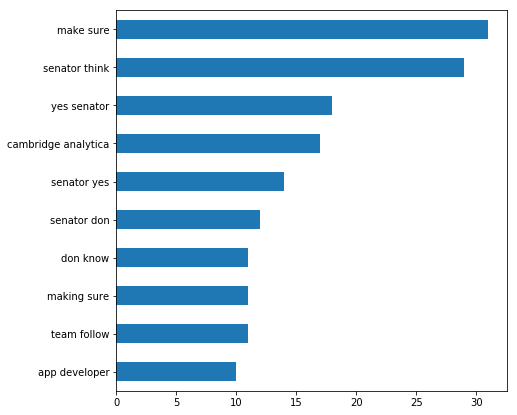

In [79]:
get_imp(mark,mf=5000,ngram=2).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

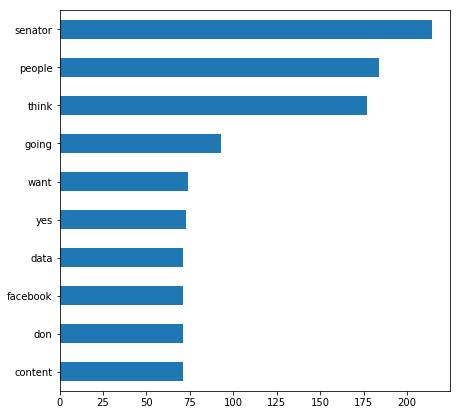

In [80]:
get_imp(mark,mf=5000,ngram=1).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### White house ji bhi bahut bolte hai

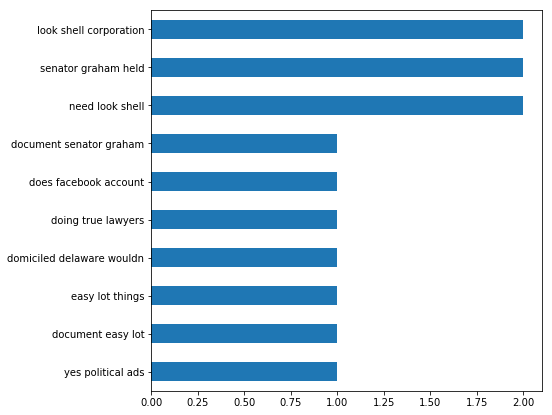

In [81]:
w=df[df['Person']=="WHITEHOUSE:"]['Text'].tolist()
get_imp(w,mf=5000,ngram=3).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

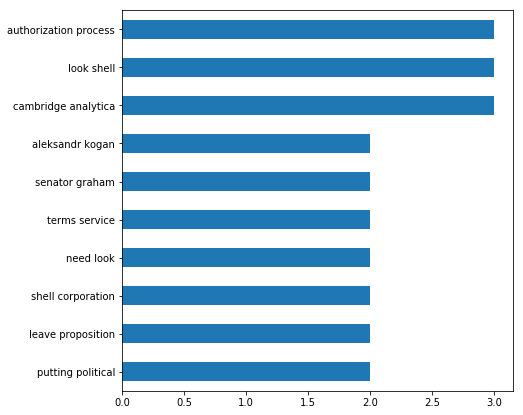

In [82]:
get_imp(w,mf=5000,ngram=2).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### Cruz tum bhi bolo

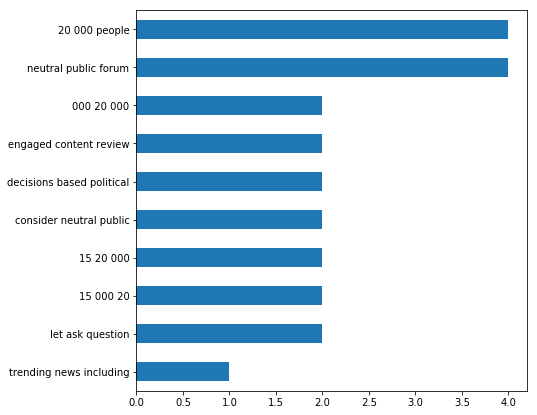

In [83]:
c=df[df['Person']=="CRUZ:"]['Text'].tolist()
get_imp(c,mf=5000,ngram=3).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

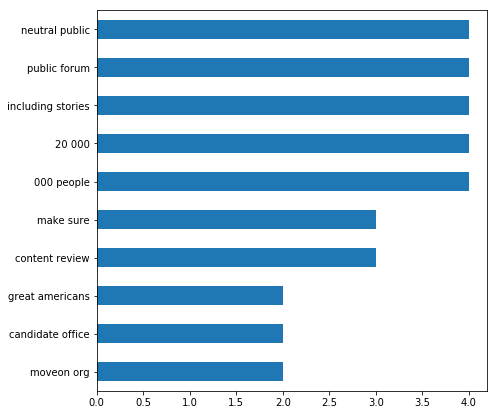

In [84]:
get_imp(c,mf=5000,ngram=2).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### In Combination what do all senators want to say!!!!

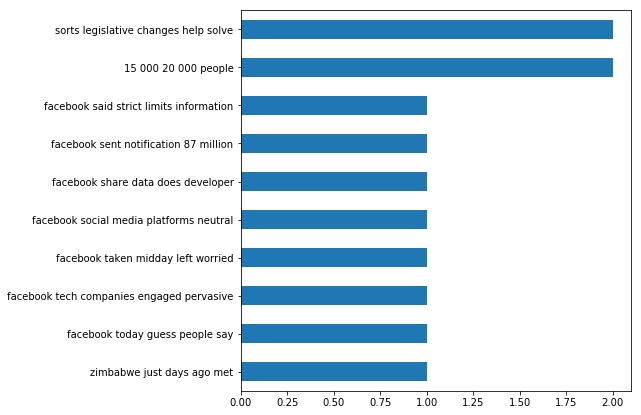

In [85]:
S=df[(df['Person']=="CRUZ:")|(df['Person']=="WHITEHOUSE:")|(df['Person']=="WHITEHOUSE:")|(df['Person']=="SCHATZ:")|(df['Person']=="COONS:")|(df['Person']=="JOHNSON:")|(df['Person']=="DURBIN:")|(df['Person']=="UDALL:")|(df['Person']=="CANTWELL:")|(df['Person']=="HELLER:")|(df['Person']=="CORNYN:")|(df['Person']=="LEAHY:")|(df['Person']=="LEE:")|(df['Person']=="KLOBUCHAR:")|(df['Person']=="BLUNT:")|(df['Person']=="FLAKE:")|(df['Person']=="MORAN:")|(df['Person']=="NELSON:")|(df['Person']=="WICKER:")|(df['Person']=="FEINSTEIN:")|(df['Person']=="HATCH:")]['Text'].tolist()
get_imp(S,mf=5000,ngram=5).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

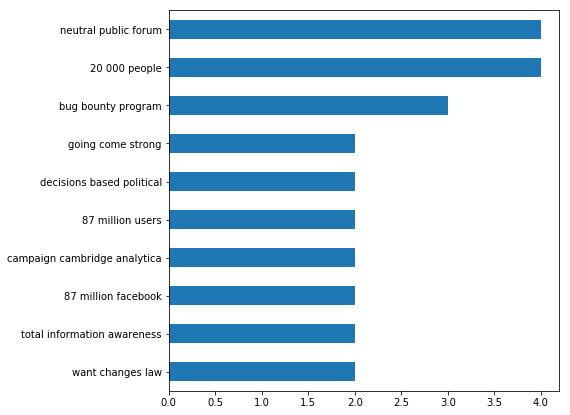

In [86]:
get_imp(S,mf=5000,ngram=3).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

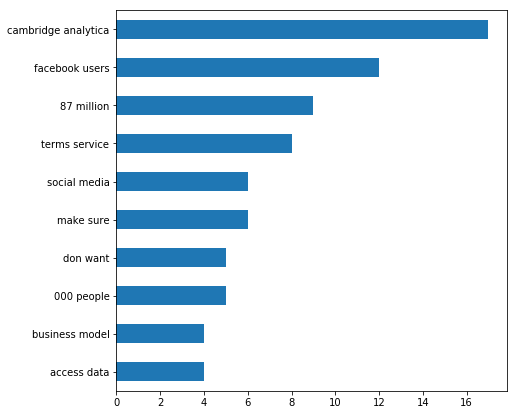

In [87]:
get_imp(S,mf=5000,ngram=2).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### Sentiment Analysis

In [91]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [94]:
analize_sentiment(df['Text'].iloc[0])

1

In [95]:
clean_tweet(df['Text'].iloc[0])

'I ll start with you Facebook handles extensive amounts of personal data for billions of users A significant amount of that data is shared with third party developers who utilize your platform As of this early this year you did not actively monitor whether that data was transferred by such developers to other parties Moreover your policies only prohibit transfers by developers to parties seeking to profit from such data Number one besides Professor Kogan s transfer and now potentially Cubeyou do you know of any instances where user data was improperly transferred to third party in breach of Facebook s terms If so how many times has that happened and was Facebook only made aware of that transfer by some third party'

In [96]:
df.shape

(858, 3)

In [99]:
df['sentiment']="Other"
for i in range(0,853):
    analysis = TextBlob(clean_tweet(df['Text'].iloc[i]))
    if analysis.sentiment.polarity > 0:
        df['sentiment'].iloc[i]='Positive'
    elif analysis.sentiment.polarity == 0:
        df['sentiment'].iloc[i]='Negative'
    else:
        df['sentiment'].iloc[i]='Neutral'

C:\Users\moham\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
df['sentiment'].value_counts()

Positive    439
Negative    319
Neutral      95
Other         5
Name: sentiment, dtype: int64

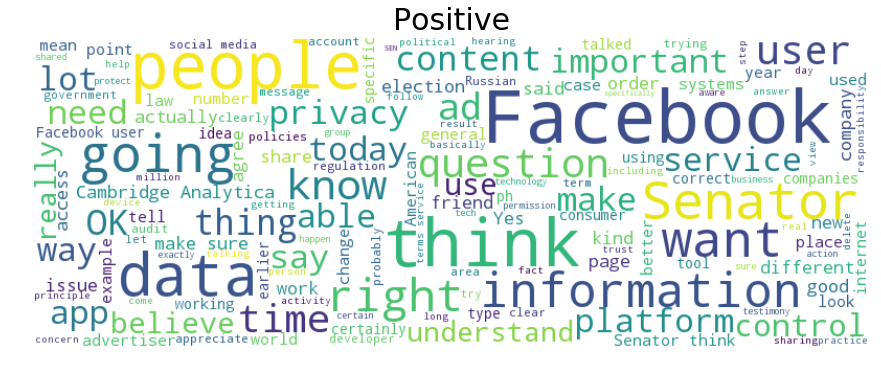

In [101]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS)
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"].loc[df['sentiment']=='Positive']
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Positive", fontsize=30)
plt.axis("off")
plt.savefig("mark",dpi=600)
plt.show()

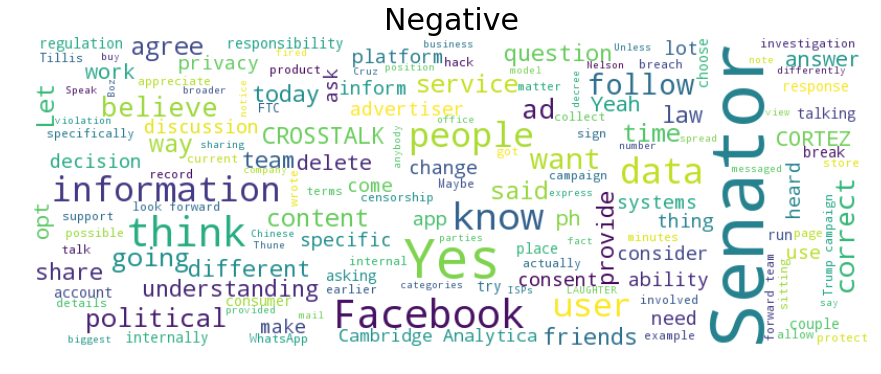

In [103]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS)
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"].loc[df['sentiment']=='Negative']
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Negative", fontsize=30)
plt.axis("off")
plt.savefig("mark",dpi=600)
plt.show()